In [12]:
from __future__ import print_function
import keras
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from keras import optimizers
from keras.optimizers import SGD
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")
 
#Import Tensorflow with multiprocessing 

import tensorflow as tf
import multiprocessing as mp

In [14]:
batch_size = 32
num_classes = 10
epochs = 30
data_augmentation = True

In [15]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (50000, 3, 32, 32)
50000 train samples
10000 test samples


In [16]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

In [18]:
def base_model():
    
    model = Sequential()
 
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
    model.add(Dropout(0.2))
 
    model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
    #model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, 
                                    #beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
                                    #moving_variance_initializer='ones', beta_regularizer=None, 
                                    #gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
    model.add(MaxPooling2D(pool_size=(2,2)))
 
    model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.2))
 
    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
 
    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
   # model.add(Dropout(0.2))
 
    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
 
    model.add(Flatten())
    #model.add(Dropout(0.2))
    model.add(Dense(1024,activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
 
    
    opt = optimizers.SGD(lr=0.0008, decay=0.000, momentum=0.9, nesterov=True)
    # Train model
 
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [19]:
cnn_n = base_model()
cnn_n.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 16, 16)        9248      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 16, 16)        18496     
__________

In [20]:
# Fit model
 
#cnn = cnn_n.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test),shuffle=True)
if not data_augmentation:
    print('Not using data augmentation.')
    cnn_n.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)


Using real-time data augmentation.


In [21]:
 # Fit the model on the batches generated by datagen.flow().
history=cnn_n.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Epoch 1/30
1563/1563 [==============================] - 25s 16ms/step - loss: 2.0218 - acc: 0.2477 - val_loss: 1.7792 - val_acc: 0.3699
Epoch 2/30
1563/1563 [==============================] - 24s 15ms/step - loss: 1.7120 - acc: 0.3832 - val_loss: 1.6127 - val_acc: 0.4280
Epoch 3/30
1563/1563 [==============================] - 24s 16ms/step - loss: 1.5640 - acc: 0.4355 - val_loss: 1.5094 - val_acc: 0.4687
Epoch 4/30
1563/1563 [==============================] - 24s 15ms/step - loss: 1.4711 - acc: 0.4708 - val_loss: 1.3796 - val_acc: 0.5121
Epoch 5/30
1563/1563 [==============================] - 24s 15ms/step - loss: 1.3949 - acc: 0.5000 - val_loss: 1.3263 - val_acc: 0.5393
Epoch 6/30
1563/1563 [==============================] - 24s 15ms/step - loss: 1.3218 - acc: 0.5279 - val_loss: 1.2550 - val_acc: 0.5530
Epoch 7/30
1563/1563 [==============================] - 24s 15ms/step - loss: 1.2579 - acc: 0.5506 - val_loss: 1.1595 - val_acc: 0.5899
Epoch 8/30
1563/1563 [==========================

In [24]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model_revised3.h5'

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
cnn_n.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = cnn_n.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at /home/ubuntu/mynotebooks/saved_models/keras_cifar10_trained_model_revised3.h5 
10000/10000 [==============================] - 2s 164us/step
Test loss: 0.6194539049625397
Test accuracy: 0.7892


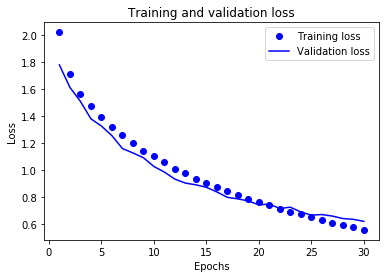

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

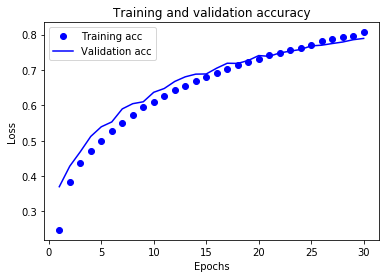

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [1]:
from __future__ import print_function
import keras
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from keras import optimizers
from keras.optimizers import SGD
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")
 
#Import Tensorflow with multiprocessing 

import tensorflow as tf
import multiprocessing as mp

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
batch_size = 64
num_classes = 10
epochs = 50
data_augmentation = True
num_predictions = 20

In [3]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 3, 32, 32)
50000 train samples
10000 test samples


In [4]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

In [5]:
def base_model():
    
    model = Sequential()
 
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
    #model.add(Dropout(0.2))
 
    model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
    model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, 
                                    beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
                                    moving_variance_initializer='ones', beta_regularizer=None, 
                                    gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
    model.add(MaxPooling2D(pool_size=(2,2)))
 
    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    #model.add(Dropout(0.4))
 
    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
 
    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    #model.add(Dropout(0.2))
 
    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    
 
    model.add(Flatten())
    #model.add(Dropout(0.2))
    model.add(Dense(1024,activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
 
    
    opt = optimizers.SGD(lr=0.0008, decay=0.000, momentum=0.9, nesterov=True)
    # Train model
 
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [6]:
cnn_n = base_model()
cnn_n.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 16, 16)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 16, 16)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 8, 8)          0         
__________

In [7]:
# Fit model
 
#cnn = cnn_n.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test),shuffle=True)
if not data_augmentation:
    print('Not using data augmentation.')
    cnn_n.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)


Using real-time data augmentation.


In [8]:
 # Fit the model on the batches generated by datagen.flow().
history=cnn_n.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Epoch 1/50
782/782 [==============================] - 24s 31ms/step - loss: 1.7980 - acc: 0.3435 - val_loss: 1.4531 - val_acc: 0.4788
Epoch 2/50
782/782 [==============================] - 23s 29ms/step - loss: 1.4021 - acc: 0.4965 - val_loss: 1.2480 - val_acc: 0.5468
Epoch 3/50
782/782 [==============================] - 23s 29ms/step - loss: 1.2277 - acc: 0.5613 - val_loss: 1.0882 - val_acc: 0.6092
Epoch 4/50
782/782 [==============================] - 22s 28ms/step - loss: 1.1107 - acc: 0.6038 - val_loss: 0.9955 - val_acc: 0.6457
Epoch 5/50
782/782 [==============================] - 22s 28ms/step - loss: 1.0130 - acc: 0.6424 - val_loss: 0.9514 - val_acc: 0.6582
Epoch 6/50
782/782 [==============================] - 22s 28ms/step - loss: 0.9402 - acc: 0.6670 - val_loss: 0.8699 - val_acc: 0.6941
Epoch 7/50
782/782 [==============================] - 22s 28ms/step - loss: 0.8867 - acc: 0.6881 - val_loss: 0.8006 - val_acc: 0.7214
Epoch 8/50
782/782 [==============================] - 22s 28ms

In [9]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model_revised1.h5'

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
cnn_n.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = cnn_n.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at /home/ubuntu/mynotebooks/saved_models/keras_cifar10_trained_model_revised1.h5 
10000/10000 [==============================] - 2s 175us/step
Test loss: 0.5120789506554604
Test accuracy: 0.8383


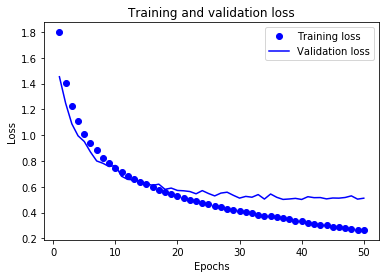

In [10]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

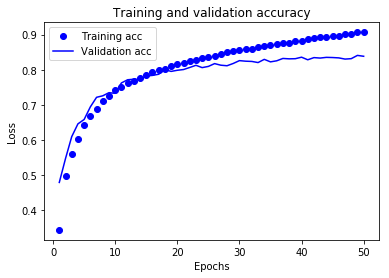

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()